In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
path = "./TEST/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [3]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.5,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
isolation_parameters = {
     "model" : "microfaune",
     "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

# Example parameters for TweetyNET
#isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

### Pandas Ouput of Automated Labeling 

In [4]:
automated_df = generate_automated_labels(path,isolation_parameters);

1/1 [==============================] - 0s 374ms/step


### Function that gathers statistics about the duration of annotations

In [5]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,59,2.02,8.683796,8.962595,1.139184,4.121293,6.844082,9.224694,55.420816


### Function that converts annotations into 3 second chunks

In [6]:
annotation_chunker(automated_df, 3)

,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,ScreamingPiha1.wav,32.615986,0,0.0,3.0,44100,bird
1,ScreamingPiha1.wav,32.615986,0,3.0,3.0,44100,bird
2,ScreamingPiha1.wav,32.615986,0,6.0,3.0,44100,bird
3,ScreamingPiha1.wav,32.615986,0,9.0,3.0,44100,bird
4,ScreamingPiha1.wav,32.615986,0,12.0,3.0,44100,bird
...,...,...,...,...,...,...,...
180,ScreamingPiha9.wav,37.302857,0,21.0,3.0,44100,bird
181,ScreamingPiha9.wav,37.302857,0,24.0,3.0,44100,bird
182,ScreamingPiha9.wav,37.302857,0,27.0,3.0,44100,bird
183,ScreamingPiha9.wav,37.302857,0,30.0,3.0,44100,bird


### Human Manual Labels for Comparison 

In [7]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [8]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Histogram Visualization of Annotation Lengths

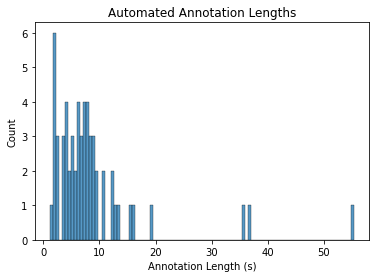

In [9]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

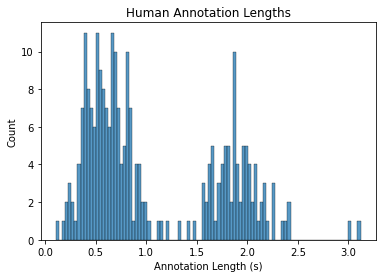

In [10]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [11]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


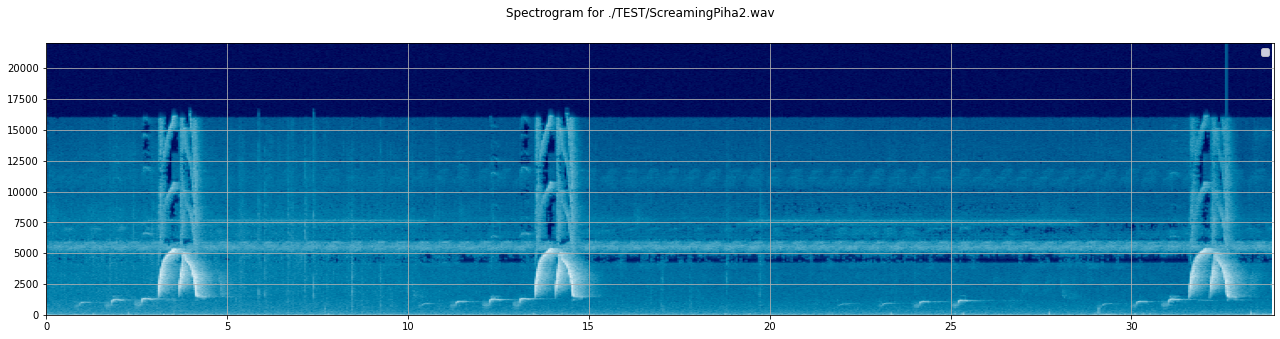

In [12]:
clip_path = "./TEST/ScreamingPiha2.wav"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

1/1 [==============================] - 1s 1s/step


No handles with labels found to put in legend.


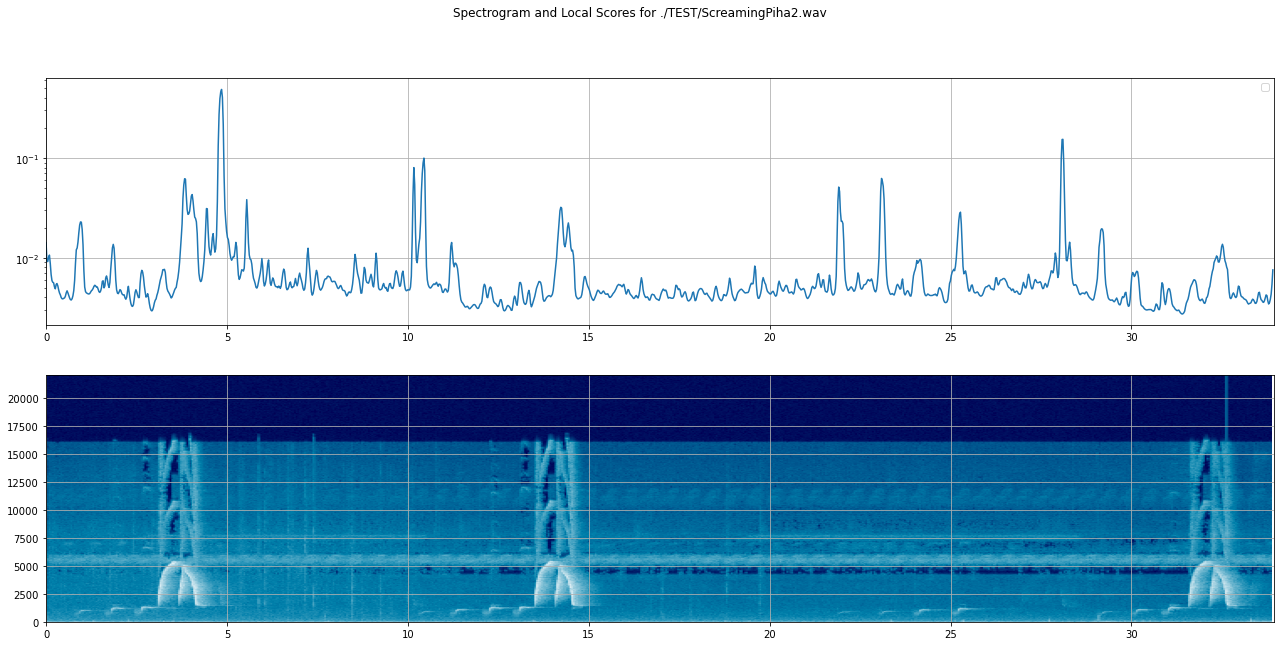

In [13]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

1/1 [==============================] - 1s 1s/step


No handles with labels found to put in legend.


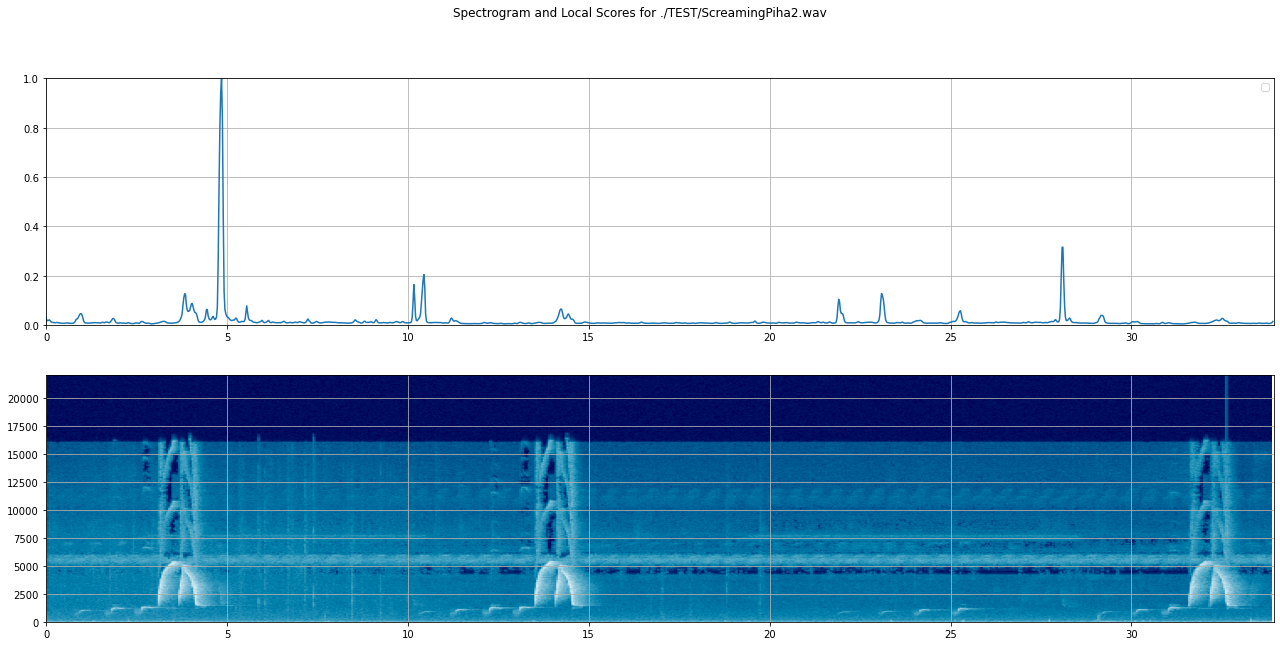

In [14]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

1/1 [==============================] - 1s 1s/step


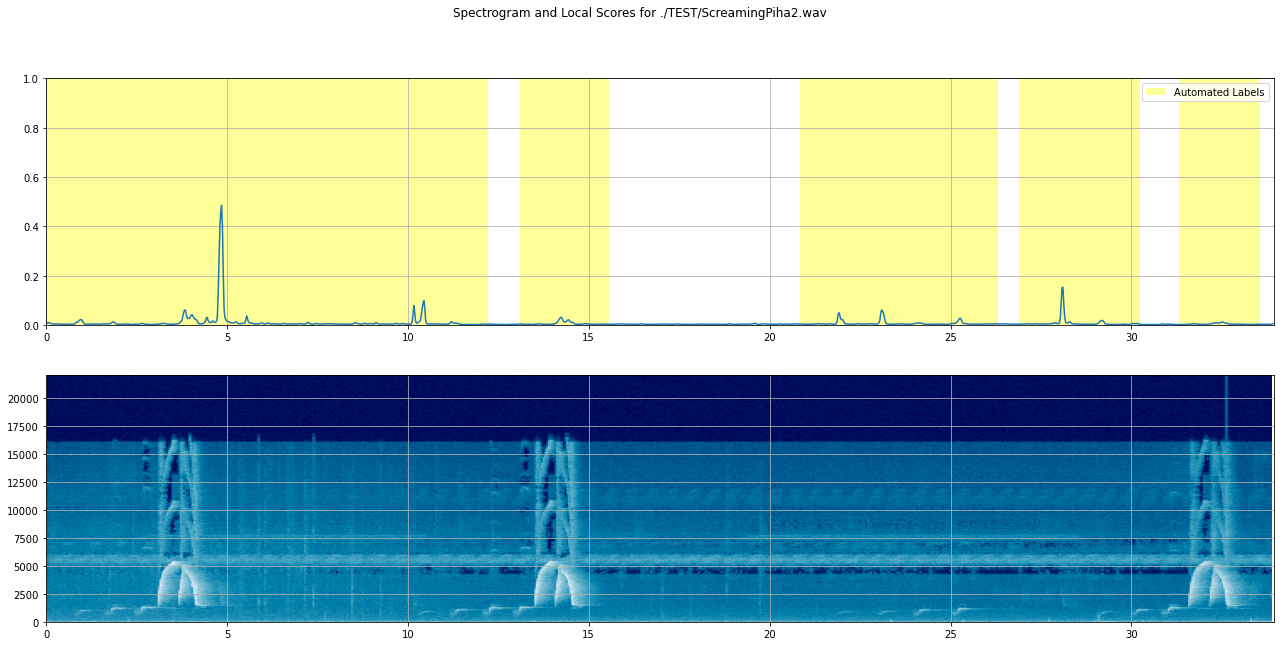

In [15]:
spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

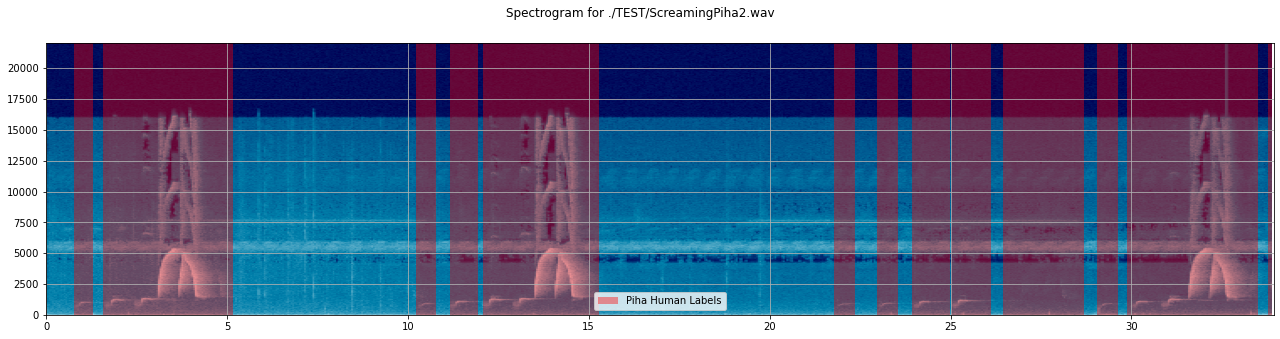

In [16]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

1/1 [==============================] - 1s 1s/step


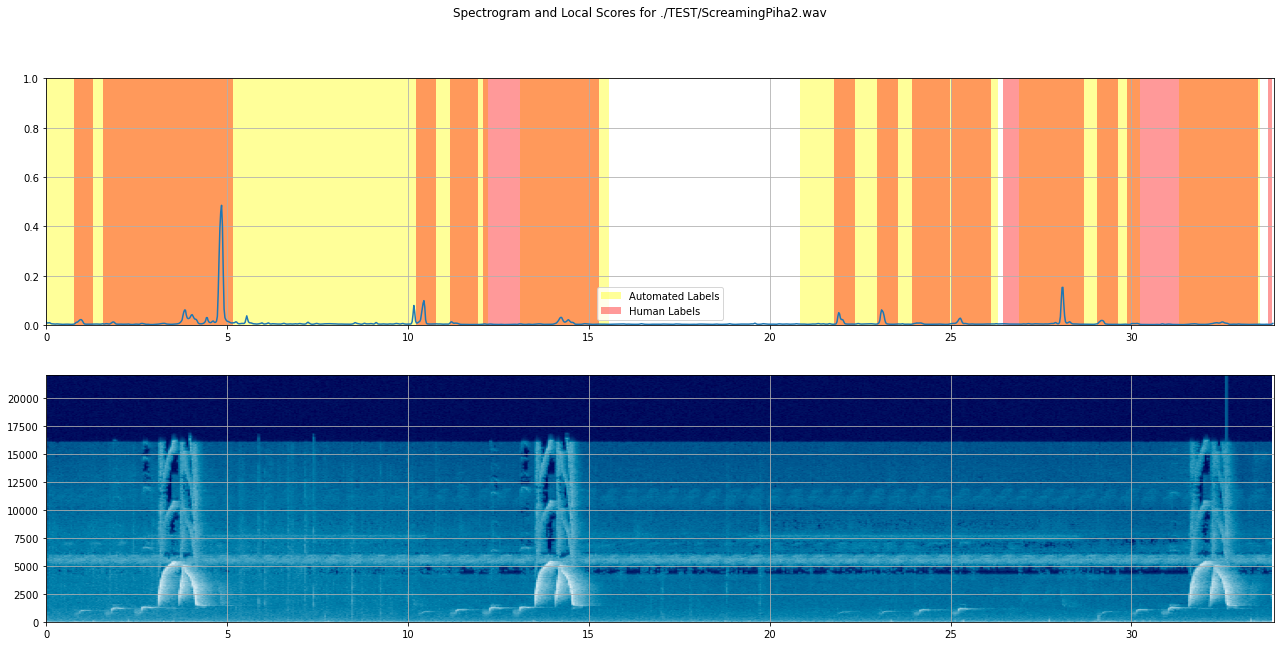

In [17]:
spectrogram_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

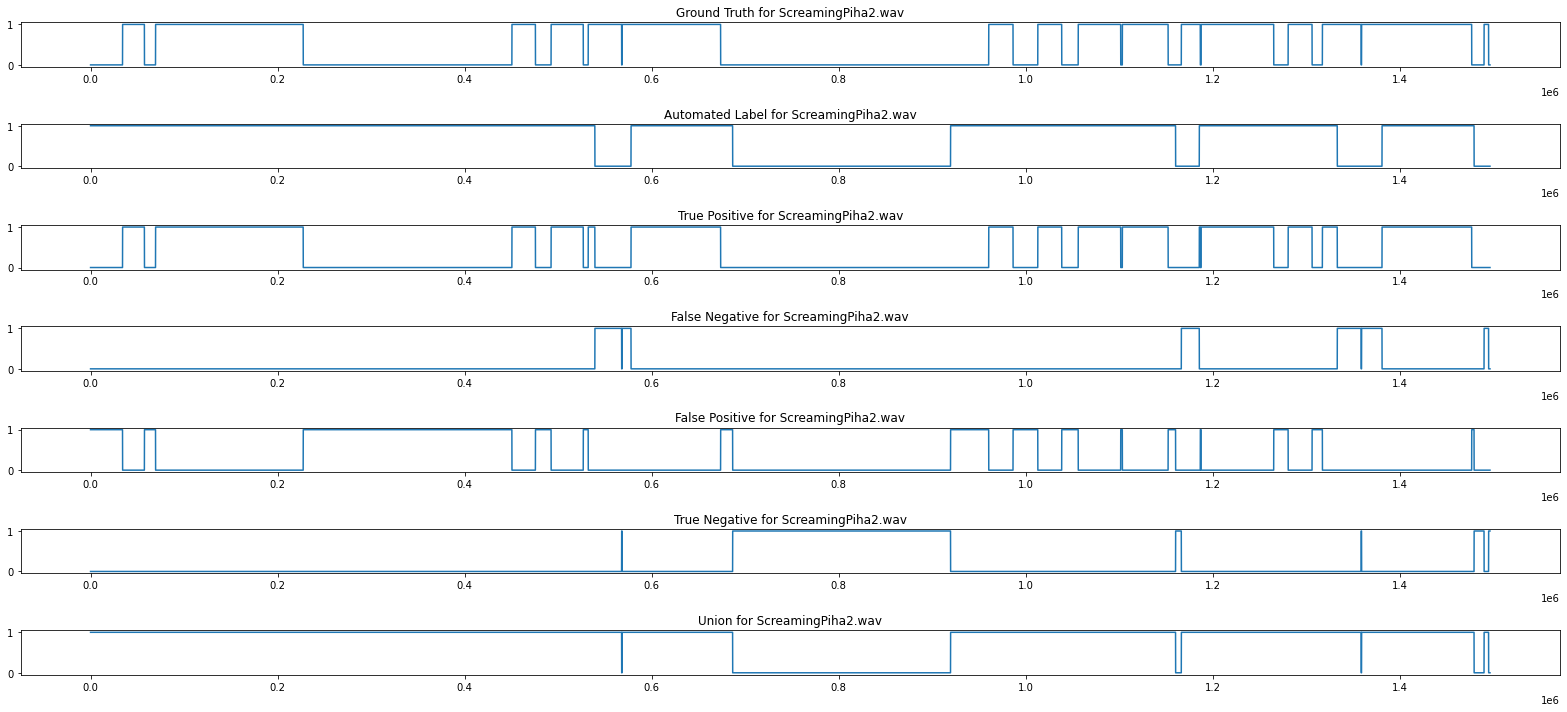

In [18]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [19]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,ScreamingPiha1.wav,bird,14.200454,17.458254,0.087755,0.869524,31.746463,0.448548,0.993858,0.618124,0.447308
1,./TEST/,ScreamingPiha10.wav,bird,32.995147,40.981179,6.386145,9.420385,80.362472,0.446023,0.837838,0.582143,0.410579
2,./TEST/,ScreamingPiha11.wav,bird,30.032902,24.502948,7.784467,1.575193,62.320317,0.550700,0.794156,0.650392,0.481912
3,./TEST/,ScreamingPiha2.wav,bird,16.004286,9.720952,2.487438,5.720385,28.212676,0.622124,0.865484,0.723898,0.567273
4,./TEST/,ScreamingPiha3.wav,bird,4.455692,2.388390,0.000000,0.000000,6.844082,0.651028,1.000000,0.788634,0.651028
5,./TEST/,ScreamingPiha4.wav,bird,5.401565,4.067959,0.000000,4.088027,9.469524,0.570416,1.000000,0.726452,0.570416
6,./TEST/,ScreamingPiha5.wav,bird,30.348617,17.702200,4.950023,1.177120,53.000839,0.631594,0.859767,0.728226,0.572606
7,./TEST/,ScreamingPiha6.wav,bird,24.858254,35.185193,0.000000,10.591633,60.043447,0.414004,1.000000,0.585577,0.414004
8,./TEST/,ScreamingPiha7.wav,bird,49.756531,78.644490,1.873673,3.315510,130.274694,0.387509,0.963710,0.552754,0.381936
9,./TEST/,ScreamingPiha8.wav,bird,6.900091,36.813243,0.000000,0.407483,43.713333,0.157849,1.000000,0.272659,0.157849


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [20]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.464714,0.89135,0.610919,0.439801


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [21]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.0532 0.     0.     0.     0.    ]
 [0.1718 0.     0.     0.     0.    ]
 [0.0433 0.     0.     0.     0.    ]
 [0.0466 0.     0.     0.     0.    ]
 [0.0695 0.     0.     0.     0.    ]
 [0.0638 0.     0.     0.     0.    ]
 [0.0125 0.     0.     0.     0.    ]
 [0.     0.1425 0.     0.     0.    ]
 [0.     0.     0.1081 0.     0.    ]
 [0.     0.7306 0.     0.     0.    ]
 [0.     0.     0.1888 0.     0.    ]
 [0.     0.     0.1063 0.     0.    ]
 [0.     0.     0.2034 0.     0.    ]
 [0.     0.     0.     0.0064 0.    ]
 [0.     0.     0.     0.1734 0.    ]
 [0.     0.     0.     0.5261 0.    ]
 [0.     0.     0.     0.     0.0821]
 [0.     0.     0.     0.0919 0.    ]
 [0.     0.     0.     0.     0.8738]
 [0.     0.     0.     0.     0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [22]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha2.wav,bird,3,17,2,0.6,0.15,0.24


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [23]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Division by zero setting precision, recall, and f1 to zero on ScreamingPiha1.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha11.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha3.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha4.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha5.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha6.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha7.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha8.wav


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./TEST/,ScreamingPiha1.wav,bird,0,13,4,0.0000,0.000,0.0000
1,./TEST/,ScreamingPiha10.wav,bird,2,38,11,0.1538,0.050,0.0755
2,./TEST/,ScreamingPiha11.wav,bird,0,35,8,0.0000,0.000,0.0000
3,./TEST/,ScreamingPiha2.wav,bird,3,17,2,0.6000,0.150,0.2400
4,./TEST/,ScreamingPiha3.wav,bird,0,6,1,0.0000,0.000,0.0000
5,./TEST/,ScreamingPiha4.wav,bird,0,8,1,0.0000,0.000,0.0000
6,./TEST/,ScreamingPiha5.wav,bird,0,30,5,0.0000,0.000,0.0000
7,./TEST/,ScreamingPiha6.wav,bird,0,19,7,0.0000,0.000,0.0000
8,./TEST/,ScreamingPiha7.wav,bird,0,51,7,0.0000,0.000,0.0000
9,./TEST/,ScreamingPiha8.wav,bird,0,9,3,0.0000,0.000,0.0000


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [25]:
global_stats_df = global_statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,N/A,7,247,52,0.1186,0.0276,0.0447
